# Traffic Signs Recognition

### Goal of this project: 
Given a various traffic signs along with images dataset,  
we are challenged to classify traffic signs present in the image into different categories.

### Notebook Workflow:
- Setup Libraries
- Load the Data
- Preprocessing 
- Baseline (Logistic Regression)
- Build Convolutional Neural Networks (CNN)
- Applying Transfer Learning 

### Extra:
- Visualization
- Prediction Application

# 

### 1. Setup Libraries:

#### Data manipulation and Preprocessing libraries:

In [1]:
import os
import pathlib
import numpy as np

#### Visualization libraries:

In [2]:
import matplotlib.pyplot as plt

#### Sci-Kit Learn libraries:

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
from sklearn.linear_model    import LogisticRegression

In [5]:
from sklearn.preprocessing   import StandardScaler

In [6]:
from sklearn.metrics         import accuracy_score

#### Tensorflow libraries:

In [159]:
import keras 

In [7]:
from keras.models                          import Sequential

In [8]:
from tensorflow.keras.utils                import to_categorical

In [158]:
from tensorflow.keras.applications         import mobilenet_v2

In [160]:
from tensorflow.keras.models               import Model

In [9]:
from tensorflow.keras.layers                  import Conv2D, MaxPool2D, Dense, Flatten, Dropout, MaxPooling2D, GlobalAveragePooling2D 

In [10]:
from tensorflow.keras.preprocessing.image  import ImageDataGenerator, img_to_array, array_to_img, load_img

# 

### 2. Load The Data 

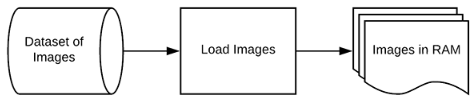

In [11]:
data_path  = '/Users/macbookproretina13inch/Downloads/German/Train'

In [12]:
def load_data(data_dir):
    images = list()
    labels = list()
    for category in range(num_categories):
        categories = os.path.join(data_dir, str(category))
        for img in os.listdir(categories):
            img   = load_img(os.path.join(categories, img), target_size=(32, 32))
            image = img_to_array(img)
            images.append(image)
            labels.append(category)    
    return images, labels

In [13]:
num_categories = len(os.listdir(data_path))
num_categories

43

In [110]:
images, labels = load_data(data_path)

In [111]:
images = np.array(images)

In [16]:
#labels = np.array(labels)

# 

### 3. Preprocessing

- Set height and width size for the images

In [17]:
img_height = 32
img_width  = 32

- Set the Labels (Classes)

In [18]:
# Label Overview
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

- Let's check how our labels are distributed ?

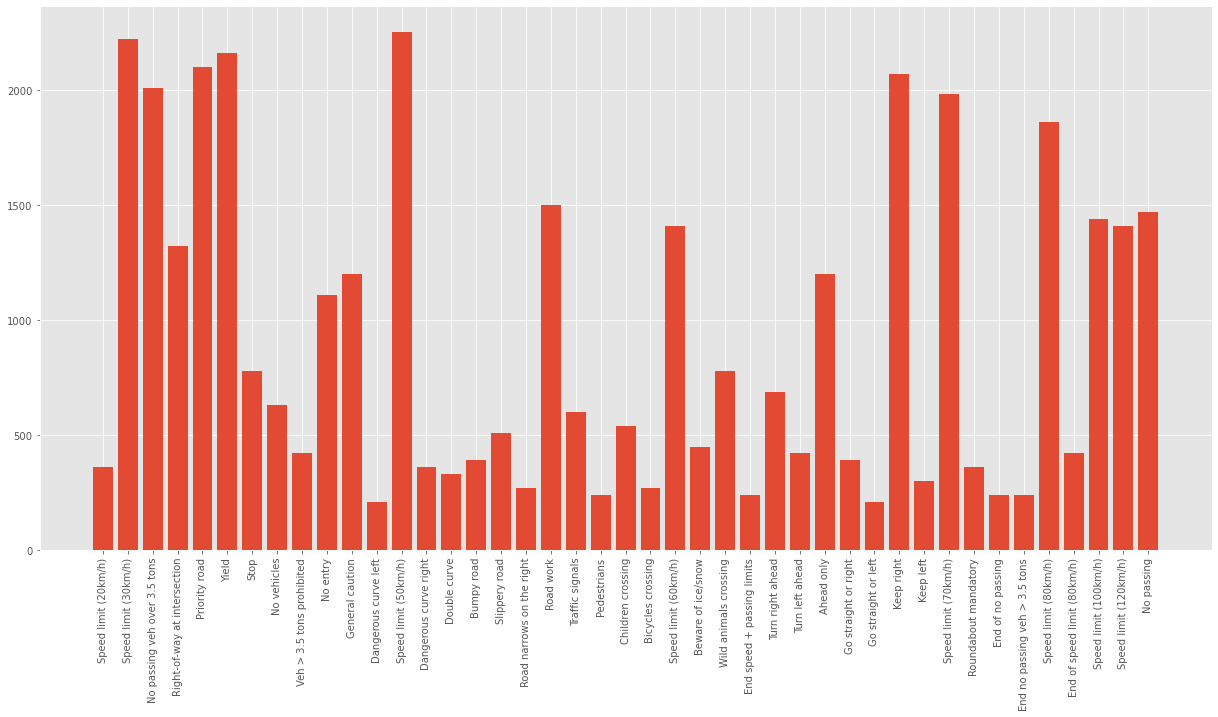

In [163]:
folders = os.listdir(data_path)
train_number = []
class_num    = []

for folder in folders:
    train_files = os.listdir(data_path + '/' + folder)
    train_number.append(len(train_files))
    class_num.append(classes[int(folder)])
    

plt.figure(figsize=(21,10))  
plt.bar(class_num, train_number)
plt.xticks(class_num, rotation='vertical')
plt.show()

-  Considering the types of traffic signs, we found that there is a huge difference in the preparation of the different classes,  
Let's see how keras model will handling the class Imbalance struggle

### Baseline Preprocessing 

- Reshape the size of images 

In [19]:
len(images)

39359

In [20]:
images.shape

(39359, 32, 32, 3)

In [21]:
images_reshaped = images.reshape(39359,32*32*3) # for baseline

In [22]:
images_reshaped.shape 

(39359, 3072)

# 

#### Spliting the images into train,  validation  and test sets

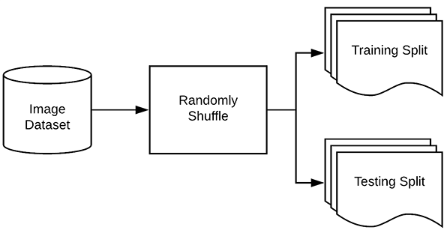

In [23]:
X, X_test, y, y_test = train_test_split(images_reshaped, labels, test_size=.2, random_state=10, shuffle=True)

In [24]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=10, shuffle=True)

# 

### 4. Baseline(Logistic Regression)

In [25]:
lm = LogisticRegression(multi_class='ovr', solver='liblinear', max_iter=15)

- Feature scaling for train, val, and test so that we can run our model

In [26]:
scaler = StandardScaler()

In [27]:
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled   = scaler.transform(X_val)
X_test_scaled  = scaler.transform(X_test)

In [28]:
# Validate score
lm.fit(X_train, y_train)
print(f'Linear Regression val R^2:  {lm.score(X_val, y_val):.3f}')

/Users/macbookproretina13inch/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Linear Regression val R^2:  0.912


In [29]:
# Test score
lm.fit(X,y)
print(f'Linear Regression test R^2:{lm.score(X_test, y_test):.3f}')

/Users/macbookproretina13inch/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Linear Regression test R^2:0.923


Wow! , we get  92%  accuracy in our Baseline, but do we can get more with Deep learning models? 

# 

# 

#### -   Preprocessing for Deep learning models: 

In [30]:
# One-hot encode the labels

In [112]:
labels = to_categorical(labels)

In [32]:
# re-split 

In [113]:
X, X_test, y, y_test = train_test_split(images, labels, test_size=.2, random_state=10, shuffle=True)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.25, random_state=10, shuffle=True)

In [45]:
# Normalization 

In [114]:
X_train /= 255
X_val   /= 255
X_test  /= 255

In [36]:
#shape overview

In [59]:
print('X_train shape:', X_train.shape)
print('Number of images in X_train', X_train.shape[0])

X_train shape: (23615, 32, 32, 3)
Number of images in X_train 23615


In [60]:
print('X_val shape:', X_val.shape)
print('Number of images in X_val', X_val.shape[0])

X_val shape: (7872, 32, 32, 3)
Number of images in X_val 7872


In [63]:
print('X_val shape:', X_test.shape)
print('Number of images in X_val', X_test.shape[0])

X_val shape: (7872, 32, 32, 3)
Number of images in X_val 7872


In [61]:
print('y_train shape:', y_train.shape)
print('Number of images in y_train', y_train.shape[0])

y_train shape: (23615, 43)
Number of images in y_train 23615


In [62]:
print('y_val shape:', y_val.shape)
print('Number of images in y_val', y_val.shape[0])

y_val shape: (7872, 43)
Number of images in y_val 7872


In [64]:
print('y_val shape:', y_test.shape)
print('Number of images in y_val', y_test.shape[0])

y_val shape: (7872, 43)
Number of images in y_val 7872


In [115]:
input_shape=(32,32,3)

# 

### 5. Build Convolutional Neural Networks (CNN)

In [116]:
model = Sequential()

# First Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=input_shape))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

# Second Convolutional Layer
model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

# Third Convolutional Layer
model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))

model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(Dense(num_categories, activation='softmax'))

# Compiling the model
lr = 0.001
model.compile(loss='categorical_crossentropy',optimizer="adam",metrics=['accuracy'])

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 4, 4, 64)         

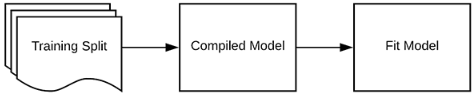

In [117]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val ) ,epochs=15)

Epoch 1/15
738/738 [==============================] - 37s 47ms/step - loss: 1.6132 - accuracy: 0.5496 - val_loss: 0.4449 - val_accuracy: 0.8712
Epoch 2/15
738/738 [==============================] - 33s 45ms/step - loss: 0.3884 - accuracy: 0.8822 - val_loss: 0.1811 - val_accuracy: 0.9520
Epoch 3/15
738/738 [==============================] - 31s 41ms/step - loss: 0.2330 - accuracy: 0.9302 - val_loss: 0.1203 - val_accuracy: 0.9693
Epoch 4/15
738/738 [==============================] - 28s 38ms/step - loss: 0.1644 - accuracy: 0.9497 - val_loss: 0.1045 - val_accuracy: 0.9719
Epoch 5/15
738/738 [==============================] - 33s 45ms/step - loss: 0.1247 - accuracy: 0.9627 - val_loss: 0.0751 - val_accuracy: 0.9778
Epoch 6/15
738/738 [==============================] - 33s 45ms/step - loss: 0.1062 - accuracy: 0.9675 - val_loss: 0.0642 - val_accuracy: 0.9820
Epoch 7/15
738/738 [==============================] - 34s 45ms/step - loss: 0.0882 - accuracy: 0.9722 - val_loss: 0.0588 - val_accuracy:

#### Display of the accuracy and the loss values

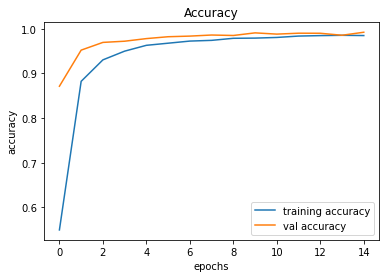

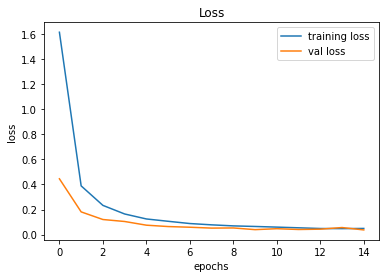

In [118]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

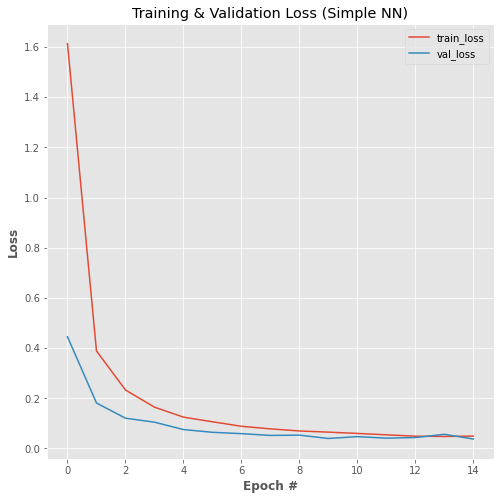

In [119]:
# plot the training and validation loss
N = np.arange(0, 15)
plt.style.use("ggplot")
plt.figure(figsize = [8,8])
plt.plot(N, history.history["loss"], label="train_loss")
plt.plot(N, history.history["val_loss"], label="val_loss")
plt.title("Training & Validation Loss (Simple NN)")
plt.xlabel("Epoch #", weight="bold")
plt.ylabel("Loss", weight="bold")
plt.legend()
plt.show()

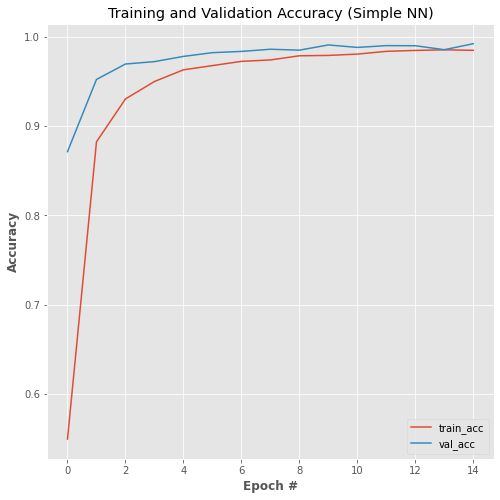

In [120]:
# plot the training and validation accuracy
N = np.arange(0, 15)
plt.style.use("ggplot")
plt.figure(figsize = [8,8])
plt.plot(N, history.history["accuracy"], label="train_acc")
plt.plot(N, history.history["val_accuracy"], label="val_acc")
plt.title("Training and Validation Accuracy (Simple NN)")
plt.xlabel("Epoch #", weight="bold")
plt.ylabel("Accuracy", weight="bold")
plt.legend()
plt.show()

#### Accuracy Score of CNN model

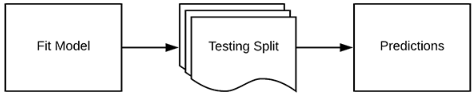

In [121]:
y_pred = model.predict(X_test)
y_pred = np.round(y_pred).astype(int)

In [122]:
accuracy_score(y_test, y_pred)

0.9894563008130082

# 

### 6. Applying Transfer Learning (MobileNet)

-  MobileNets: Efficient Convolutional Neural Networks for Mobile Vision Applications

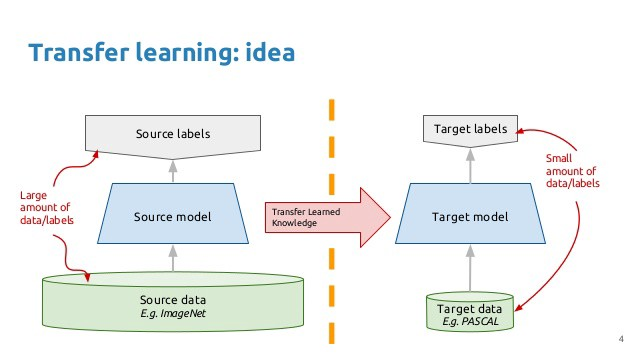

- Set the pre-trained model from Keras.

In [136]:
mobile = keras.applications.mobilenet.MobileNet()
def prepare_image(file):
    img_path = ''
    img = image.load_img(img_path + file, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

- Freeze the base layers and Add new "top" layer.

In [145]:
base_model= mobilenet_v2.MobileNetV2(weights='imagenet',include_top=False, input_shape=input_shape) #imports the mobilenet model and discards the last 1000 neuron layer.

x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x=Dense(1024,activation='relu')(x) #dense layer 2
x=Dense(512,activation='relu')(x)  #dense layer 3
preds=Dense(43,activation='softmax')(x) #final layer with softmax activation

- Specify the inputs and the outputs to be based on our architecture

In [147]:
model=Model(inputs=base_model.input,outputs=preds)

- Check the model architecture

In [148]:
for i,layer in enumerate(model.layers):
     print(i,layer.name)

0 input_5
1 Conv1
2 bn_Conv1
3 Conv1_relu
4 expanded_conv_depthwise
5 expanded_conv_depthwise_BN
6 expanded_conv_depthwise_relu
7 expanded_conv_project
8 expanded_conv_project_BN
9 block_1_expand
10 block_1_expand_BN
11 block_1_expand_relu
12 block_1_pad
13 block_1_depthwise
14 block_1_depthwise_BN
15 block_1_depthwise_relu
16 block_1_project
17 block_1_project_BN
18 block_2_expand
19 block_2_expand_BN
20 block_2_expand_relu
21 block_2_depthwise
22 block_2_depthwise_BN
23 block_2_depthwise_relu
24 block_2_project
25 block_2_project_BN
26 block_2_add
27 block_3_expand
28 block_3_expand_BN
29 block_3_expand_relu
30 block_3_pad
31 block_3_depthwise
32 block_3_depthwise_BN
33 block_3_depthwise_relu
34 block_3_project
35 block_3_project_BN
36 block_4_expand
37 block_4_expand_BN
38 block_4_expand_relu
39 block_4_depthwise
40 block_4_depthwise_BN
41 block_4_depthwise_relu
42 block_4_project
43 block_4_project_BN
44 block_4_add
45 block_5_expand
46 block_5_expand_BN
47 block_5_expand_relu
48 b

- Compiling the model and check the summary

In [149]:
model.compile(loss='categorical_crossentropy',optimizer="adam",metrics=['accuracy'])

model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 16, 16, 32)   864         input_5[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 16, 16, 32)   128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 16, 16, 32)   0           bn_Conv1[0][0]                   
____________________________________________________________________________________________

block_16_expand_BN (BatchNormal (None, 1, 1, 960)    3840        block_16_expand[0][0]            
__________________________________________________________________________________________________
block_16_expand_relu (ReLU)     (None, 1, 1, 960)    0           block_16_expand_BN[0][0]         
__________________________________________________________________________________________________
block_16_depthwise (DepthwiseCo (None, 1, 1, 960)    8640        block_16_expand_relu[0][0]       
__________________________________________________________________________________________________
block_16_depthwise_BN (BatchNor (None, 1, 1, 960)    3840        block_16_depthwise[0][0]         
__________________________________________________________________________________________________
block_16_depthwise_relu (ReLU)  (None, 1, 1, 960)    0           block_16_depthwise_BN[0][0]      
__________________________________________________________________________________________________
block_16_p

- Train the model

In [150]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val) ,epochs=15)

Epoch 1/15
738/738 [==============================] - 153s 200ms/step - loss: 1.9025 - accuracy: 0.4304 - val_loss: 3.6251 - val_accuracy: 0.1885
Epoch 2/15
738/738 [==============================] - 153s 208ms/step - loss: 0.9538 - accuracy: 0.7011 - val_loss: 2.6586 - val_accuracy: 0.4681
Epoch 3/15
738/738 [==============================] - 164s 222ms/step - loss: 0.6338 - accuracy: 0.8109 - val_loss: 2.0308 - val_accuracy: 0.6467
Epoch 4/15
738/738 [==============================] - 161s 218ms/step - loss: 0.4807 - accuracy: 0.8646 - val_loss: 1.2105 - val_accuracy: 0.7998
Epoch 5/15
738/738 [==============================] - 162s 219ms/step - loss: 0.3913 - accuracy: 0.8911 - val_loss: 0.9915 - val_accuracy: 0.7295
Epoch 6/15
738/738 [==============================] - 163s 221ms/step - loss: 0.2976 - accuracy: 0.9204 - val_loss: 0.5174 - val_accuracy: 0.8681
Epoch 7/15
738/738 [==============================] - 166s 226ms/step - loss: 0.2927 - accuracy: 0.9224 - val_loss: 0.8904 -

- Accuracy score after applying the pretrained model

In [151]:
y_pred = model.predict(X_test)
y_pred = np.round(y_pred).astype(int)

In [152]:
accuracy_score(y_test, y_pred)

0.9644308943089431

Although we apply pre-traind model over our architecture, we get less Accuracy.

### Extra - Visualization

- Visualizing all the different Signs

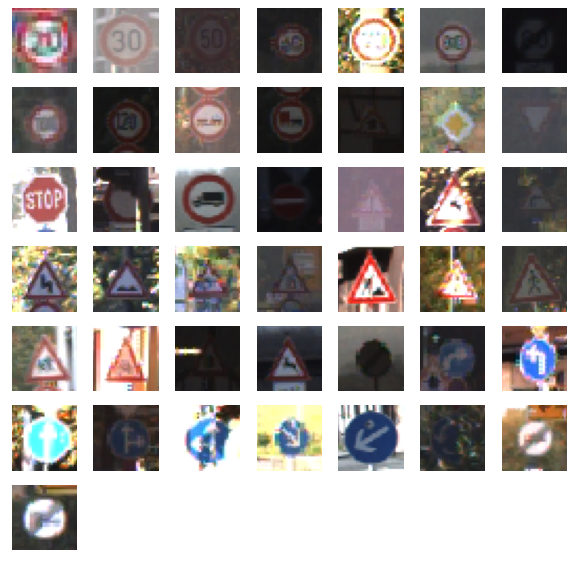

In [175]:
img_dir = pathlib.Path(data_path)
plt.figure(figsize=(10,10))
index = 0

for i in range(num_categories):
    plt.subplot(7, 7, i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    sign = list(img_dir.glob(f'{i}/*'))[0]
    img = load_img(sign, target_size=(img_width, img_height))
    plt.imshow(img)
plt.show()

- Prediction Application

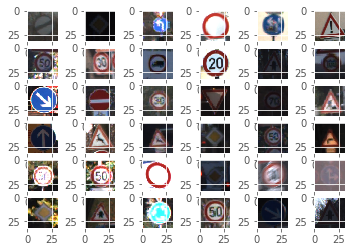

In [168]:
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.imshow(X_test[i])

In [173]:
image_index = 12

3072
The predicted image is Keep right


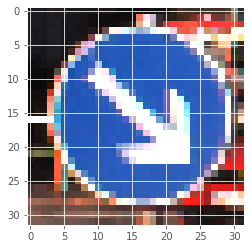

In [174]:
plt.imshow(X_test[image_index])
n = np.array(X_test[image_index])
print(n.size)
p = n.reshape(1, 32, 32, 3)
pred = classes[model.predict(p).argmax()]
print("The predicted image is {}".format(pred))

#### - End of this notebook - 